<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440MODULE4%20PRACTICAL%20ACTIVITES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

In [3]:
# Simulating a customer dataset
np.random.seed(42)
num_samples = 500
num_features = 10

data, _ = make_classification(n_samples=num_samples, n_features=num_features, random_state=42)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range (1, num_features + 1)])
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,-0.831822,3.778560,-0.916192,-0.690541,-0.715760,-0.825560,-4.887584,-0.783766,-2.016605,-0.067178
1,-0.066133,-0.440522,-0.436720,0.265878,-0.247026,0.140124,1.030778,-0.470042,0.527629,2.099722
2,-0.437458,-1.526773,-0.887492,0.419532,-0.372833,0.013308,-1.389822,-0.120948,-1.320396,0.722381
3,-0.526035,-0.811048,0.492019,0.420973,1.097153,0.174118,1.016694,0.698828,0.412293,-2.153343
4,-0.305225,-0.054340,-1.065114,-1.311836,-0.186971,-0.011333,-0.173507,0.010353,-0.125711,-0.609512
...,...,...,...,...,...,...,...,...,...,...
495,0.197316,1.735034,0.088658,1.236131,-0.316073,-0.323481,-1.660165,0.965397,-0.555309,-0.617652
496,-0.548200,-0.481014,0.553149,-2.082099,-0.774615,0.297890,2.647677,0.242882,1.542078,1.923446
497,-0.570351,1.051644,0.352505,-0.258854,0.270057,0.114396,2.255453,1.223083,1.733286,-1.820603
498,1.640615,0.882100,1.362563,-1.049655,-1.123494,0.015669,1.048374,0.568103,0.918593,3.152057


In [5]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,-0.773331,2.655077,-0.936646,-0.693219,-0.816335,-4.197446,-3.740511,-0.832667,-2.330921,-0.035174
1,-0.035596,-0.360868,-0.450800,0.241479,-0.338047,0.774340,0.829591,-0.514489,0.623309,2.131333
2,-0.393365,-1.137357,-0.907565,0.391643,-0.466419,0.121435,-1.039573,-0.160439,-1.522519,0.754243
3,-0.478707,-0.625732,0.490286,0.393051,1.033529,0.949357,0.818715,0.670976,0.489386,-2.120959
4,-0.265959,-0.084811,-1.087548,-1.300403,-0.276769,-0.005431,-0.100346,-0.027274,-0.135315,-0.577409


In [7]:
# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2D for visualization
data_pca = pca.fit_transform(data_scaled)



In [9]:
# Converting PCA results into a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca.head()

,PC1,PC2
0,-6.416404,1.633926
1,1.177060,-0.060448
2,-1.030849,-1.742615
3,1.616643,-0.255770
4,0.004522,-0.047675


In [10]:
# K-Means Clustering (Optional, to segment customers)
kmeans = KMeans(n_clusters=3, random_state=42)
data_pca['Cluster'] = kmeans.fit_predict(data_pca)


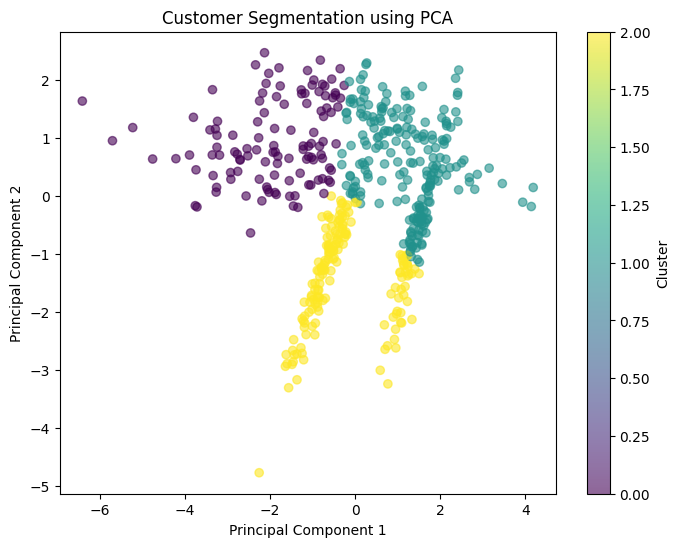

In [11]:
# Visualizing the PCA-transformed data with clusters
plt.figure(figsize=(8,6))
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=data_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation using PCA')
plt.colorbar(label='Cluster')
plt.show()



In [12]:
# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.24365566 0.16283935]
